In [1]:
import os
import plaid
import requests
import datetime
import json
import pandas as pd
%matplotlib inline

In [2]:
def pretty_print_response(response):
  print(json.dumps(response, indent=4, sort_keys=True))

In [3]:
PLAID_CLIENT_ID = os.getenv('PLAID_CLIENT_ID')
PLAID_SECRET = os.getenv('PLAID_SBX_SECRET_KEY')
PLAID_PUBLIC_KEY = os.getenv('PLAID_PUBLIC_KEY')
PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')

# Plaid Access Token

In this section, you will use the plaid-python api to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:
1. Create a client to connect to paid
2. Use the client to generate a public token and request the following items: 
['transactions', 'income', 'assets']
3. Exchange the public token for an access token
4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [4]:
INSTITUTION_ID = "ins_109508"

In [5]:
# YOUR CODE HERE
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SECRET, public_key=PLAID_PUBLIC_KEY, environment='sandbox')
client.Institutions.get(2)

{'institutions': [{'country_codes': ['US'],
   'credentials': [{'label': 'Username', 'name': 'username', 'type': 'text'},
    {'label': 'Password', 'name': 'password', 'type': 'password'}],
   'has_mfa': False,
   'input_spec': 'fixed',
   'institution_id': 'ins_25',
   'mfa': [],
   'mfa_code_type': 'numeric',
   'name': 'Ally Bank',
   'products': ['assets',
    'auth',
    'balance',
    'transactions',
    'income',
    'identity'],
   'routing_numbers': ['124003116']},
  {'country_codes': ['US'],
   'credentials': [{'label': 'Login ID', 'name': 'username', 'type': 'text'},
    {'label': 'Password', 'name': 'password', 'type': 'password'}],
   'has_mfa': True,
   'input_spec': 'fixed',
   'institution_id': 'ins_113968',
   'mfa': ['questions'],
   'mfa_code_type': 'numeric',
   'name': 'Amegy Bank of Texas - Personal Banking',
   'products': ['assets', 'auth', 'balance', 'transactions', 'income'],
   'routing_numbers': ['113011258']}],
 'request_id': 'bFdiEgjehgQbpAb',
 'total': 10

### 2. Generate a public token

In [6]:
# YOUR CODE HERE
create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])

### 3. Exchange the public token for an access token

In [7]:
# YOUR CODE HERE
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])

### 4. Fetch Accounts

In [8]:
# YOUR CODE HERE
access_token = exchange_response['access_token']
client.Accounts.get(access_token)

{'accounts': [{'account_id': '6awlB8mdN1H69DvrKLjphD77GBbP5LFglrbnk',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'X4NPw51BEDcZJxqn1NXLFPggbx6zWeudX5P88',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'Dgr7w5RVj9SevJRBQZ8lcWeeEZvMwbsvozEGp',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days
2. Print the categories for each transaction type
3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)
4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [9]:
# YOUR CODE HERE

# Get transactions for institution for specific date range 90 days
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())

# Get transactions for date range
transaction_response = client.Transactions.get(access_token,start_date,end_date)

# Print JSON output to check files (2 records)
print(json.dumps(transaction_response['transactions'][:2],indent=4, sort_keys=True))

[
    {
        "account_id": "rrLE5dR9y4ijPeMmwrlKFPeeekQjjLclAyaNq",
        "account_owner": null,
        "amount": 2078.5,
        "category": [
            "Payment"
        ],
        "category_id": "16000000",
        "date": "2019-09-27",
        "iso_currency_code": "USD",
        "location": {
            "address": null,
            "city": null,
            "country": null,
            "lat": null,
            "lon": null,
            "postal_code": null,
            "region": null,
            "store_number": null
        },
        "name": "AUTOMATIC PAYMENT - THANK",
        "payment_meta": {
            "by_order_of": null,
            "payee": null,
            "payer": null,
            "payment_method": null,
            "payment_processor": null,
            "ppd_id": null,
            "reason": null,
            "reference_number": null
        },
        "pending": false,
        "pending_transaction_id": null,
        "transaction_id": "WaoN458zgeHQDW3vwRr1uVAAM

### 2. Print the categories for each transaction

In [10]:
# YOUR CODE HERE
for transactions in transaction_response['transactions']:
    print(transactions['category'])

['Payment']
['Food and Drink', 'Restaurants']
['Shops', 'Sporting Goods']
['Payment', 'Credit Card']
['Travel', 'Car Service', 'Ride Share']
['Transfer', 'Debit']
['Transfer', 'Deposit']
['Recreation', 'Gyms and Fitness Centers']
['Travel', 'Airlines and Aviation Services']
['Food and Drink', 'Restaurants']
['Food and Drink', 'Restaurants', 'Coffee Shop']
['Food and Drink', 'Restaurants']
['Transfer', 'Credit']
['Travel', 'Airlines and Aviation Services']
['Travel', 'Car Service', 'Ride Share']
['Food and Drink', 'Restaurants']
['Payment']
['Food and Drink', 'Restaurants']
['Shops', 'Sporting Goods']
['Payment', 'Credit Card']
['Travel', 'Car Service', 'Ride Share']
['Transfer', 'Debit']
['Transfer', 'Deposit']
['Recreation', 'Gyms and Fitness Centers']
['Travel', 'Airlines and Aviation Services']
['Food and Drink', 'Restaurants']
['Food and Drink', 'Restaurants', 'Coffee Shop']
['Food and Drink', 'Restaurants']
['Transfer', 'Credit']
['Travel', 'Airlines and Aviation Services']
['Trav

### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category. 

(For categories with more than one label, just use the first category label in the list)

In [11]:
# YOUR CODE HERE
#set emprty lists to store data
date = []
name = []
amount = []
category = []

#Update empty list with data for each column
for transactions in transaction_response['transactions']:
    date.append(transactions['date'])
    name.append(transactions['name'])
    amount.append(transactions['amount'])
    category.append(transactions['category'][0])
    
#merger lists
zippedList =  list(zip(name, amount, category, date))

#create dataframes with column names
df = pd.DataFrame(zippedList, columns = ['Name' , 'Amount', 'Category', 'Date']) 

In [12]:
#Check dataframe first 5 entries
df.head()

,Name,Amount,Category,Date
0,AUTOMATIC PAYMENT - THANK,2078.5,Payment,2019-09-27
1,KFC,500.0,Food and Drink,2019-09-27
2,Madison Bicycle Shop,500.0,Shops,2019-09-27
3,CREDIT CARD 3333 PAYMENT *//,25.0,Payment,2019-09-18
4,Uber 063015 SF**POOL**,5.4,Travel,2019-09-18


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [13]:
# YOUR CODE HERE
#Check original dataframe type
df.dtypes

Name         object
Amount      float64
Category     object
Date         object
dtype: object

In [14]:
#convert date from object to datetime
df['Date'] = df['Date'].astype('datetime64[ns]')

In [15]:
#recheck dataframe type
df.dtypes

Name                object
Amount             float64
Category            object
Date        datetime64[ns]
dtype: object

In [16]:
#update index to be date
df = df.set_index('Date')

In [17]:
#check update
df.head()

,Name,Amount,Category
Date,,,
2019-09-27,AUTOMATIC PAYMENT - THANK,2078.5,Payment
2019-09-27,KFC,500.0,Food and Drink
2019-09-27,Madison Bicycle Shop,500.0,Shops
2019-09-18,CREDIT CARD 3333 PAYMENT *//,25.0,Payment
2019-09-18,Uber 063015 SF**POOL**,5.4,Travel


# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:
1. Determine the previous year's gross income and print the results
2. Determine the current monthly income and print the results
3. Determine the projected yearly income and print the results

In [18]:
# Retrieve Income data for an Item
income_data = client.Income.get(access_token)
#check data
income_data 

{'income': {'income_streams': [{'confidence': 0.99,
    'days': 690,
    'monthly_income': 500,
    'name': 'UNITED AIRLINES'}],
  'last_year_income': 6000,
  'last_year_income_before_tax': 7285,
  'max_number_of_overlapping_income_streams': 1,
  'number_of_income_streams': 1,
  'projected_yearly_income': 6085,
  'projected_yearly_income_before_tax': 7389},
 'request_id': 'Nub80ippiJv0HXV'}

In [19]:
#Check gross income
gross_income = income_data['income']['last_year_income_before_tax']
print("Last year's gross income was $",gross_income)

Last year's gross income was $ 7285


In [20]:
#Check monthly data
monthly_income = income_data['income']['income_streams'][0]['monthly_income']
print("The monthly income is $",monthly_income)

The monthly income is $ 500


In [21]:
#Check projected income 
projected_income = income_data['income']['projected_yearly_income_before_tax']
print("The project yearly income is $",projected_income)

The project yearly income is $ 7389


---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)
2. Generate a bar chart with the number of transactions for each category 
3. Calulate the expenses per month
4. Plot the total expenses per month

### Calculate the expenses per category

In [22]:
# YOUR CODE HERE
#Group orignal dataframe by category and add all rows
expense_category = df.groupby(['Category']).sum()
expense_category

,Amount
Category,
Food and Drink,3817.19
Payment,8389.00
Recreation,235.50
Shops,2000.00
Transfer,20537.34
Travel,35.19


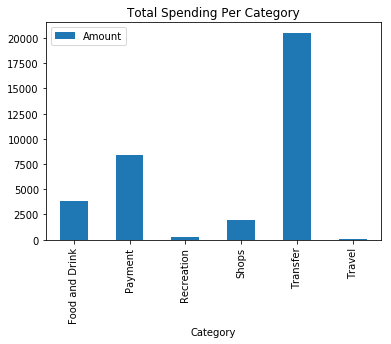

In [23]:
#Plot bar gragh
expense_category.plot.bar(title='Total Spending Per Category')

### Calculate the expenses per month

In [24]:
# YOUR CODE HERE
#group by month and add sums
expense_monthly = df.groupby(by=[df.index.month]).sum()
expense_monthly

,Amount
Date,
6,3578.50
7,10645.24
8,10645.24
9,10145.24


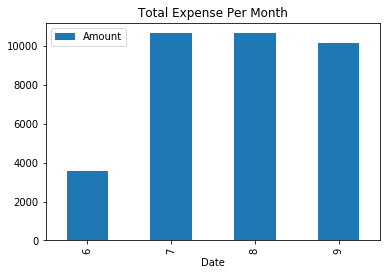

In [25]:
#plot bar graph
expense_monthly.plot.bar(title='Total Expense Per Month')